# 1. 研究课题介绍 #

智能客户端网络监控和报警

## 1.1 业务背景 ##
```
    监控和报警 目前的痛点是需要根据不同接口的情况设置阈值。这样的做法简单直接，但是有很多弊端。  
    
    一，维护大量接口的设置报警阈值
    二，容易漏报，错报  
```

## 1.2 期待结果 ##
```
    每一个网络请求就是这个模型的一个输入项，请求的各种参数（接口名称 IP 响应时间 http code 坐标等等）都是模型的影响因子，而这个模型的输出就是这个请求是不是一个故障。
    某个失败的请求可能只是偶发，多个有某些共同特征的失败请求可能就是个故障。比如在一段时间内某个坐标区域内发生了多次请求失败，那它们就会被聚类在一起，触发一次报警。不用人工去分析哪个接口阈值多少啊，哪个地区怎么设报警等等（也无法设置）。
```

## 1.3 数据源 ##
```
客户端请求原始日志


```


# 2. 数据特性分析 #

## 2.1 数据原始 格式 ##
```
[Timestampe]>> {JSON数据格式}####客户端基本信息

```



## 2.2  特征值分析 ##

JSON数据格式：
"network":[]  Native网络性能数据
"webnet":[] //web网络性能数据
"IOSUI":[] //性能数据


"webview" :[] web性能数据
 
----------------
 
### 2.2.1 network 包含的字段  ###

 
 | 字段名| 说明 |
 |------:|:-----|
 | reqSize | 网络请求大小 |
 | netType | 网络类型 2G 3G 4G wifi cellular unknown |
 | httpCode | HTTP请求状态码 |
 | mno |  运营商 移动，联通  |
 | reqUrl | 请求的URL |
 | vid | |
 | reqTime | 收到网络响应的时间   responseTime-startTime |
 | hf | 异常原因 |
 | endTime | 结束时间 |
 | startTime | 开始时间 |
 | connTime |  建立网络连接的时间 |
 | resSize | 收到响应数据大小 |
 | loc | |
 
  
 ### 2.2.2 webnet 包含的字段 ###

 | 字段名| 说明 |
 |------:|:-----|
 | netType | 网络类型 2G 3G 4G wifi cellular unknown |
 | httpCode | HTTP请求状态码 |
 | mno |  运营商 移动，联通  |
 | reqUrl | 请求的URL |
 | endTime | 结束时间 |
 | startTime | 开始时间 |
 | resSize | 收到响应数据大小 |
 
 ### 2.2.3 IOS UI 包含的字段 ###
 
 | 字段名| 说明 |
 |------:|:-----|
 | disappearTime |  |
 | visibleTime |  |
 | vid |    |
 | fps | |
 | memoryUsage | viewWillDisappear,viewDidAppear,viewDidLoad,viewWillAppear,viewDidDisappear |
 | keyMethods |  |
 | startTime |  |
 | name |  |
 | appearTime |  |
 
 
 ### 2.2.4 客户端基本信息 ###
| 参数名 | 类型 | 说明 | 
|:-------|:-----|:-----|
| cid |	String | 渠道号 |
| uid |	String | 设备唯一号，如android为手机串号，iphone为mac地址 ，ios7以后为iid |
| vid |	String | app版本号，如80011001  80开头是iphone，60开头是安卓 |
| gid |	String | 服务器为每个设备下发的唯一编号 |
| sid |	String | 服务器下发的标示，不保证唯 |
| pid |	String | 产品号 10010-去哪儿旅行客户端，10020-去哪儿酒店客户端，11010-去哪儿旅行iphone pro版客户端，12010-去哪儿生活，12010-ipad演示版（vid=81011021），19010 -ipad演示版（pid和生活版重后变更） ，18010 -iphone pro演示版，10030-英文版客户端 ,   10040-国际车OP iOS客户端，10050-国际车司机 iOS客户端 |
| aid |	String | apple id。ios客户端特有 |
| iid |	String | apple广告id | 
| mac |	String | mac地址 |
| model | String | 手机的型号 |
| osVersion	| String | 手机操作系统的版本号 |
| ke | String | 加密key |
| t | String | 接口标示，比如t=hlist代表请求酒店列表接口 t=hdetail代表请求酒店详情接口 |
| msg | String | 前端的一些操作日志（如拨打电话等动作）|
| cp | int  | 是否压缩（目前后端已经不处理了，所有的返回都压缩） |
| re | int  | 是否带resouce资源文件（目前后端已经不处理了，有resource的接口都会将resource加到返回值里） |
| un | String | 登录用户的用户名，打印日志的时候将参数打印为 username |
| mno | String | 运营商标志   46000,46002移动，46001联通，46003电信 |
| nt | String | "wifi", "2G/3G" |
| adid | String | ANDROID_ID是系统提供的一个唯一号
| ref | String | 记录页面跳转的上一个页面<BR>  A-》B-》C 从B先进后请求到C了上一个页面就是B，请求是从C发的，C的上一个页面是B; <BR>A-》B-》C 从B先请求后进到C了上一个页面就是A，请求是从B发的，B的上一个页面是A
| brush	| String | 客户端设备信息 eg：线性加 速度 lac=x,y,z 单位 m/s^2 保 留两位小数 lac=0.00,0.00,1.12 |
| gac | int | 陀螺仪 gac=x,y,z 单位m/s^2 保留两位小数 gac=-1.10,0.40,9.45 |
| lux | int | 光感 lux=24.0 单位lux 保留一位小数 |
| ori | int | 罗盘 ori=Azimuth,Pitch,Roll 保留两位小数 ori=141.20,- 0.51,-0.60 |
| is | int | 是否root/越狱 isr=0 表示未root/越狱 isr=1 表示root/越狱 |
| imsi=460001234567890
| bs | int | 电池状态: bs=0 表示未在充电, bs=1表示在充电 |
| btm | long | 开机时间: btm=1418721900000 JAVA毫秒时间戳 |
| lt | int | 经纬度模拟标识 lt：是否模拟经纬度0是正常，1是模拟的 |
| lat | String | 纬度 |
| lgt | String | 经度 |
| catom | String | 安卓新架构， 模块,模块版本信息 eg：  com.mqunar.atom.alexhome_1 |
| tsv |String | targetSDKVersion |
| usid |String | userId | 
| pitcherTid |String | 通过picher服务，pitcher服务给予每个请求的唯一标识符 |

 

### 2.2.5 特征删选 ###
reqSize   网络请求大小  
netType	  网络类型 2G 3G 4G wifi cellular unknown  
httpCode  HTTP请求状态码  
mno	    运营商 移动，联通  
reqUrl 	 请求的URL    
reqTime	 收到网络响应的时间 responseTime-startTime  
hf	    异常原因  
endTime  结束时间  
startTime	开始时间  
connTime	建立网络连接的时间  
resSize	   收到响应数据大小  
lt		经纬度模拟标识 lt：是否模拟经纬度0是正常，1是模拟的  
lat		纬度  
lgt		经度  
pid		产品号   
usid	userId  

# 3. 建模 #

## 3.1 流式计算 ##
Storm

## 3.2 节点1 线性回归 ##

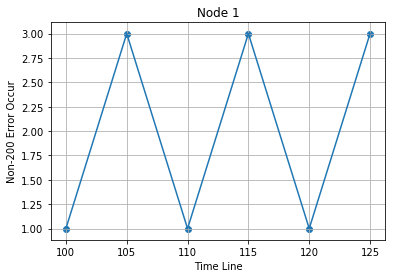

方差: 1.0
阀值 3.0
预测值 [[ 2.6]]
实际值 6
是否大于阀值 True


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 训练集合 
X_trains = [[100],[105],[110],[115],[120],[125]]
Y_trains = [[1],[3],[1],[3],[1],[3]]

# 新簇 
x = 130
y = 6

#basic  
f1 = plt.figure(1)  
plt.title('Node 1')
plt.xlabel('Time Line')
plt.ylabel('Non-200 Error Occur')
plt.grid(True)
plt.scatter(X_trains,Y_trains) 


linreg = LinearRegression()
linreg.fit(X_trains, Y_trains)

# 做预测预测
new_line = linreg.predict(X_trains)
pre_y = linreg.predict(x)

# 计算统计属性
sd = np.var(Y_trains)
n = 3*sd

# 是否大于阀值 
flag = y>n

plt.plot(X_trains,Y_trains)
plt.show()

print("方差:",sd)
print("阀值",n)
print("预测值",pre_y)
print("实际值",y)
print("是否大于阀值",flag)

